In [1]:
import pandas as pd 
import os 
import numpy as np 
from Classification_library import *
from Prediction_tool import *


In [2]:
data = pd.read_csv("rock_patches.csv")[["path", "type"]]
data

,path,type
0,Stone 6 filtered_v1/Rock6_868_filtered.png,Calcium
1,Stone 6 filtered_v1/Rock6_1424_filtered.png,Calcium
2,Stone 6 filtered_v1/Rock6_1295_filtered.png,Calcium
3,Stone 6 filtered_v1/Rock6_772_filtered.png,Calcium
4,Stone 6 filtered_v1/Rock6_462_filtered.png,Calcium
...,...,...
27351,Stone 32 filtered_v1/Rock32_46_filtered.png,Uric acid with calcium
27352,Stone 32 filtered_v1/Rock32_1344_filtered.png,Uric acid with calcium
27353,Stone 32 filtered_v1/Rock32_1456_filtered.png,Uric acid with calcium
27354,Stone 32 filtered_v1/Rock32_912_filtered.png,Uric acid with calcium


In [3]:
df_cystine = pd.read_csv("cystine_df.csv")[["path", "type"]]
df_cystine 

,path,type
0,/home/wsl/flashcards/DISK_1/Kidney stones/Cyst...,Cystine
1,/home/wsl/flashcards/DISK_1/Kidney stones/Cyst...,Cystine
2,/home/wsl/flashcards/DISK_1/Kidney stones/Cyst...,Cystine
3,/home/wsl/flashcards/DISK_1/Kidney stones/Cyst...,Cystine
4,/home/wsl/flashcards/DISK_1/Kidney stones/Cyst...,Cystine
...,...,...
897,/home/wsl/flashcards/DISK_1/Kidney stones/Cyst...,Cystine
898,/home/wsl/flashcards/DISK_1/Kidney stones/Cyst...,Cystine
899,/home/wsl/flashcards/DISK_1/Kidney stones/Cyst...,Cystine
900,/home/wsl/flashcards/DISK_1/Kidney stones/Cyst...,Cystine


In [4]:
data_learning = pd.concat([data, df_cystine])
data_learning

,path,type
0,Stone 6 filtered_v1/Rock6_868_filtered.png,Calcium
1,Stone 6 filtered_v1/Rock6_1424_filtered.png,Calcium
2,Stone 6 filtered_v1/Rock6_1295_filtered.png,Calcium
3,Stone 6 filtered_v1/Rock6_772_filtered.png,Calcium
4,Stone 6 filtered_v1/Rock6_462_filtered.png,Calcium
...,...,...
897,/home/wsl/flashcards/DISK_1/Kidney stones/Cyst...,Cystine
898,/home/wsl/flashcards/DISK_1/Kidney stones/Cyst...,Cystine
899,/home/wsl/flashcards/DISK_1/Kidney stones/Cyst...,Cystine
900,/home/wsl/flashcards/DISK_1/Kidney stones/Cyst...,Cystine


In [5]:
#data["Rock ID"].value_counts()

In [6]:
data_learning["type"].value_counts()

type
Calcium                   12662
Uric acid with calcium    12295
Pure uric acid             2399
Cystine                     902
Name: count, dtype: int64

In [7]:
idx_info = {0: 'Calcium', 1: 'Cystine', 2: 'Pure uric acid', 3: 'Uric acid with calcium'}

In [8]:
minor_classes = [list(idx_info.values()).index('Pure uric acid'),
                 list(idx_info.values()).index('Cystine')]

In [9]:
device = 'cuda'
print(f"Выбрано устройство: {device}")  

BATCH_SIZE = 64
NUM_EPOCHS = 15
NUM_WORKERS = 16

Выбрано устройство: cuda


In [10]:
type_plasma_model = Learning_rocks(df = data_learning, device = device, model_name = f'type_plasma_model.pth', BATCH_SIZE = BATCH_SIZE, num_ep = NUM_EPOCHS, num_workers=NUM_WORKERS)#, minor_classes=minor_classes, focal_gamma=3.0, major_aug= False, aug=True)

Minor classes: None
Sample label: 0, type: <class 'numpy.int64'>


In [11]:
type_plasma_model.idx_output()

{0: 'Calcium', 1: 'Cystine', 2: 'Pure uric acid', 3: 'Uric acid with calcium'}

In [12]:
type_plasma_model.learn_model()

Epochs: 100%|██████████| 15/15 [14:40<00:00, 58.69s/it]


In [13]:
type_plasma_model_test_model = ["best_model.pth", "averaged_model.pth", "type_plasma_model.pth"][-1]
type_plasma_model_test_model

'type_plasma_model.pth'

In [14]:
test_df = type_plasma_model.test_df
test_df

,path,type,label
26626,Stone 32 filtered_v1/Rock32_1916_filtered.png,Uric acid with calcium,3
12690,Stone 27 filtered_v1/Rock27_1422_filtered.png,Uric acid with calcium,3
718,Stone 6 filtered_v1/Rock6_1090_filtered.png,Calcium,0
15719,Stone 11 filtered_v1/Rock11_683_filtered.png,Uric acid with calcium,3
22576,Stone 28 filtered_v1/Rock28_1139_filtered.png,Uric acid with calcium,3
...,...,...,...
22718,Stone 28 filtered_v1/Rock28_1453_filtered.png,Uric acid with calcium,3
24611,Stone 16 filtered_v1/Rock16_373_filtered.png,Calcium,0
26220,Stone 32 filtered_v1/Rock32_2133_filtered.png,Uric acid with calcium,3
21977,Stone 28 filtered_v1/Rock28_654_filtered.png,Uric acid with calcium,3


In [15]:
test_df = test_df.reset_index(drop=True)
test_df

,path,type,label
0,Stone 32 filtered_v1/Rock32_1916_filtered.png,Uric acid with calcium,3
1,Stone 27 filtered_v1/Rock27_1422_filtered.png,Uric acid with calcium,3
2,Stone 6 filtered_v1/Rock6_1090_filtered.png,Calcium,0
3,Stone 11 filtered_v1/Rock11_683_filtered.png,Uric acid with calcium,3
4,Stone 28 filtered_v1/Rock28_1139_filtered.png,Uric acid with calcium,3
...,...,...,...
4234,Stone 28 filtered_v1/Rock28_1453_filtered.png,Uric acid with calcium,3
4235,Stone 16 filtered_v1/Rock16_373_filtered.png,Calcium,0
4236,Stone 32 filtered_v1/Rock32_2133_filtered.png,Uric acid with calcium,3
4237,Stone 28 filtered_v1/Rock28_654_filtered.png,Uric acid with calcium,3


In [16]:
test_df["type"].value_counts()

type
Calcium                   1899
Uric acid with calcium    1845
Pure uric acid             360
Cystine                    135
Name: count, dtype: int64

In [17]:
test_df.iloc[0].path

'Stone 32 filtered_v1/Rock32_1916_filtered.png'

In [18]:
type_plasma_model_predict = Predict(num_classes=len(idx_info), model_path = type_plasma_model_test_model)
type_plasma_model_predict_result = type_plasma_model_predict.predict_single_patch(test_df.iloc[0].path)
type_plasma_model_predict_result

Using device: cuda
GPU: NVIDIA GeForce RTX 4070 Laptop GPU


{'predicted_class': 3,
 'confidence': 0.9994710087776184,
 'probabilities': array([5.2398478e-04, 1.0018337e-06, 4.0299960e-06, 9.9947101e-01],
       dtype=float32)}

In [19]:
# Укажите device='cuda' вместо 'gpu'
type_plasma_model_predict = Predict(
    num_classes=len(idx_info),
    model_path=type_plasma_model_test_model,
    device='cuda'  # Исправлено на 'cuda'
)

# Пример предсказания
result = type_plasma_model_predict.predict_single_patch(test_df.iloc[0].path)
print(result)

Using device: cuda
GPU: NVIDIA GeForce RTX 4070 Laptop GPU
{'predicted_class': 3, 'confidence': 0.9994710087776184, 'probabilities': array([5.2398478e-04, 1.0018337e-06, 4.0299960e-06, 9.9947101e-01],
      dtype=float32)}


In [20]:
idx_info

{0: 'Calcium', 1: 'Cystine', 2: 'Pure uric acid', 3: 'Uric acid with calcium'}

In [21]:
from tqdm import tqdm

In [22]:
for i, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Processing images"):
    image_path = row["path"]
    
    result = type_plasma_model_predict_result = type_plasma_model_predict.predict_single_patch(image_path)
    
    predicted_label = result['predicted_class']
    probabilities = result['probabilities'] 
    
    test_df.at[i, 'Predicted_label'] = int(predicted_label)
    test_df.at[i, 'Predicted_type'] = idx_info[predicted_label]
    test_df.at[i, 'Confidence'] = result["confidence"]
    test_df.at[i, 'prob_Calcium'] = probabilities[0]
    test_df.at[i, 'prob_Cystine'] = probabilities[1]
    test_df.at[i, 'prob_Uric acid'] = probabilities[2]
    test_df.at[i, 'prob_Uric acid calcium'] = probabilities[3]

Processing images: 100%|██████████| 4239/4239 [01:05<00:00, 64.87it/s] 


In [23]:
test_df.to_excel("test_df.xlsx")

In [24]:
test_df = pd.read_excel("test_df.xlsx")

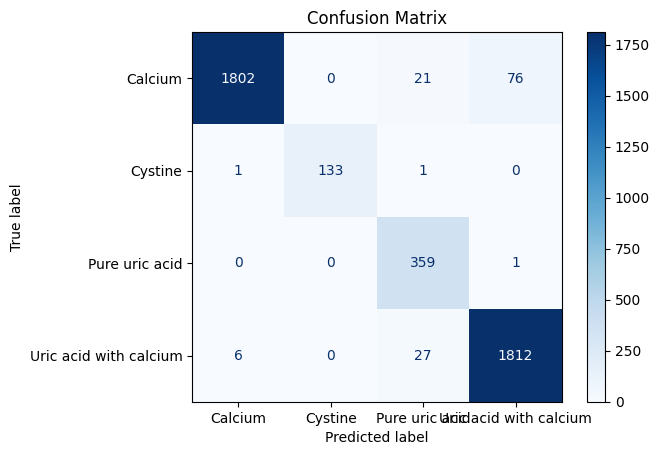

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(test_df['label'], test_df['Predicted_label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=list(idx_info.values()))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [26]:
cm

array([[1802,    0,   21,   76],
       [   1,  133,    1,    0],
       [   0,    0,  359,    1],
       [   6,    0,   27, 1812]])

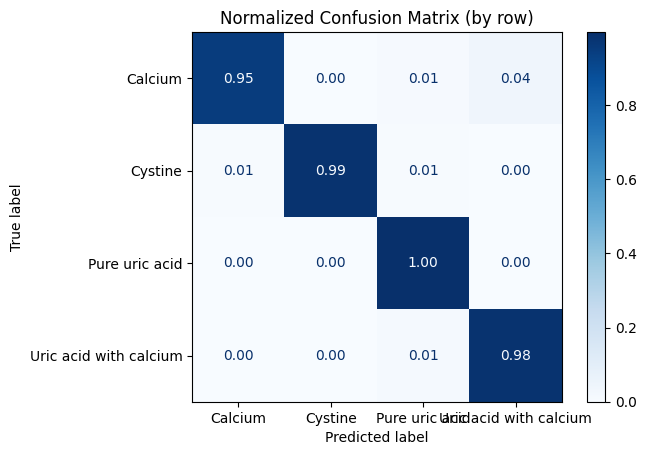

Normalized CM (row-wise):
[[0.949 0.    0.011 0.04 ]
 [0.007 0.985 0.007 0.   ]
 [0.    0.    0.997 0.003]
 [0.003 0.    0.015 0.982]]


In [27]:


# Рассчитываем обычную матрицу ошибок
cm = confusion_matrix(test_df['label'], test_df['Predicted_label'])

# Нормируем матрицу по строкам (верные метки)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Создаем визуализацию с частотами
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_normalized,
    display_labels=list(idx_info.values())
)

# Настраиваем формат отображения (два знака после запятой)
disp.plot(cmap='Blues', values_format='.2f')  # Используйте '.1%' для процентов

plt.title('Normalized Confusion Matrix (by row)')
plt.show()

# Выводим числовое представление матрицы (опционально)
print("Normalized CM (row-wise):")
print(np.round(cm_normalized, 3))

In [28]:
from sklearn.metrics import classification_report

print(classification_report(
    test_df['label'],
    test_df['Predicted_label'],
    target_names=list(idx_info.values())
))

                        precision    recall  f1-score   support

               Calcium       1.00      0.95      0.97      1899
               Cystine       1.00      0.99      0.99       135
        Pure uric acid       0.88      1.00      0.93       360
Uric acid with calcium       0.96      0.98      0.97      1845

              accuracy                           0.97      4239
             macro avg       0.96      0.98      0.97      4239
          weighted avg       0.97      0.97      0.97      4239



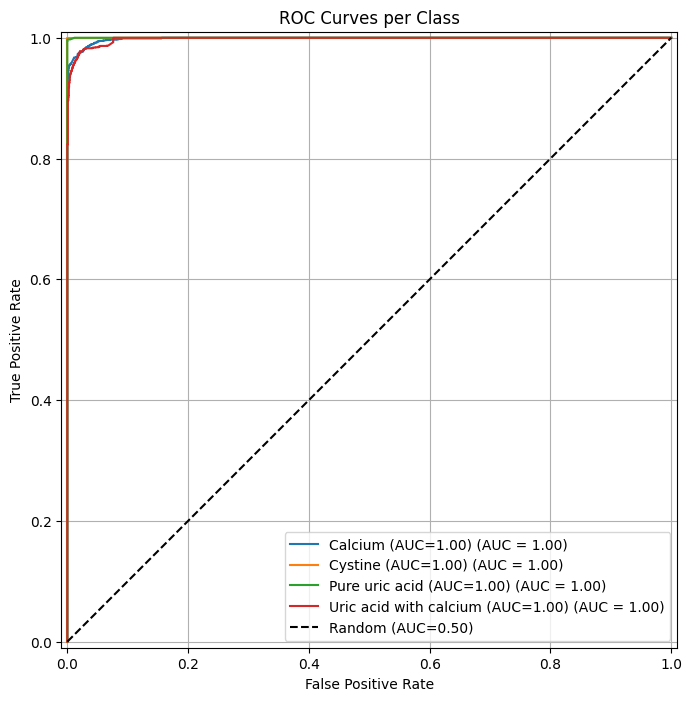

AUC Scores:
Calcium: 0.9985
Cystine: 1.0000
Pure uric acid: 1.0000
Uric acid with calcium: 0.9980


In [29]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Преобразуем метки в one-hot encoding
y_true = label_binarize(test_df['label'], classes=[0,1,2,3])
y_score = test_df[['prob_Calcium', "prob_Cystine",
                   'prob_Uric acid', 'prob_Uric acid calcium']].values

fig, ax = plt.subplots(figsize=(10, 8))

# Создадим словарь для хранения AUC значений
auc_scores = {}

for i, cls in enumerate(idx_info.values()):
    # Вычисляем ROC кривую и AUC
    fpr, tpr, _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    auc_scores[cls] = roc_auc
    
    # Строим кривую с подписью (включая AUC)
    RocCurveDisplay(
        fpr=fpr,
        tpr=tpr,
        roc_auc=roc_auc,
        estimator_name=f"{cls} (AUC={roc_auc:.2f})"
    ).plot(ax=ax)

# Добавляем диагональ (random classifier)
ax.plot([0, 1], [0, 1], 'k--', label="Random (AUC=0.50)")

ax.set_title("ROC Curves per Class")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend(loc='lower right')  # Лучшее расположение для ROC
ax.grid()
plt.show()

# Дополнительно: выведем AUC значения
print("AUC Scores:")
for cls, score in auc_scores.items():
    print(f"{cls}: {score:.4f}")

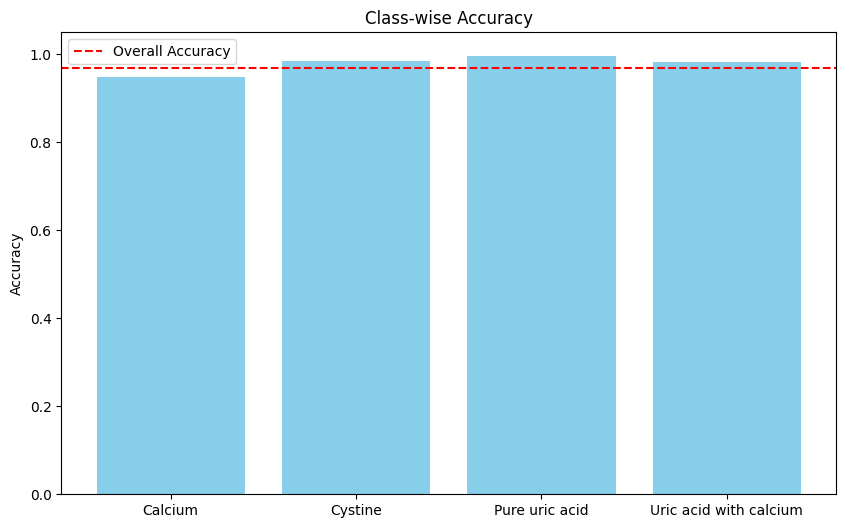

In [30]:
import numpy as np

# Вычисляем accuracy для каждого класса
class_acc = {}
for label, name in idx_info.items():
    class_samples = test_df[test_df['label'] == label]
    correct = (class_samples['label'] == class_samples['Predicted_label']).sum()
    class_acc[name] = correct / len(class_samples)

# Визуализация
plt.figure(figsize=(10, 6))
plt.bar(class_acc.keys(), class_acc.values(), color='skyblue')
plt.axhline(y=test_df['label'].eq(test_df['Predicted_label']).mean(), 
            color='r', 
            linestyle='--', 
            label='Overall Accuracy')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy')
plt.ylim(0, 1.05)
plt.legend()
plt.show()

In [31]:
test_df.to_excel("test_df.xlsx")